In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reading Files 

In [4]:
cols = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','wage_class'] 

#column names from (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names)

In [5]:
train = pd.read_csv('adult_train.csv',header=None, names = cols , na_values = ' ?')  #' ?' is discovered after later analysis, na_values is added after that analysis
test = pd.read_csv('adult_test.csv',header=None, names = cols, na_values = ' ?')

# can read directly from url, but much slower than from local. 54 seconds train  and 18 seconds test.

In [6]:
train.shape
test.shape
train.head()
test.head()

(32561, 15)

(16281, 15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


# Data Cleaning 

## Cleaning with na_values in pd.read_csv set 

In [7]:
train = train[~train.isnull().any(axis=1)]
test = test[~test.isnull().any(axis=1)]

train.shape
test.shape

(30162, 15)

(15060, 15)

##  Alternate Way to clean if data was not read in with na_values parameter

### Finding columns with ? unknown value 

In [8]:
missing_train = train == ' ?'
missing_train.sum()

missing_test = test == ' ?'
missing_test.sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

### Removing rows with  ?

In [9]:
missing_train.any(axis=1).sum()
missing_test.any(axis=1).sum()    

0

0

It is ok to remove missing rows, they only occupy <10% of the data

In [10]:
train = train[~missing_train.any(axis=1)]
test = test[~missing_test.any(axis=1)]

train.shape
test.shape

(30162, 15)

(15060, 15)

# Visualizing columns

/home/gonzalo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


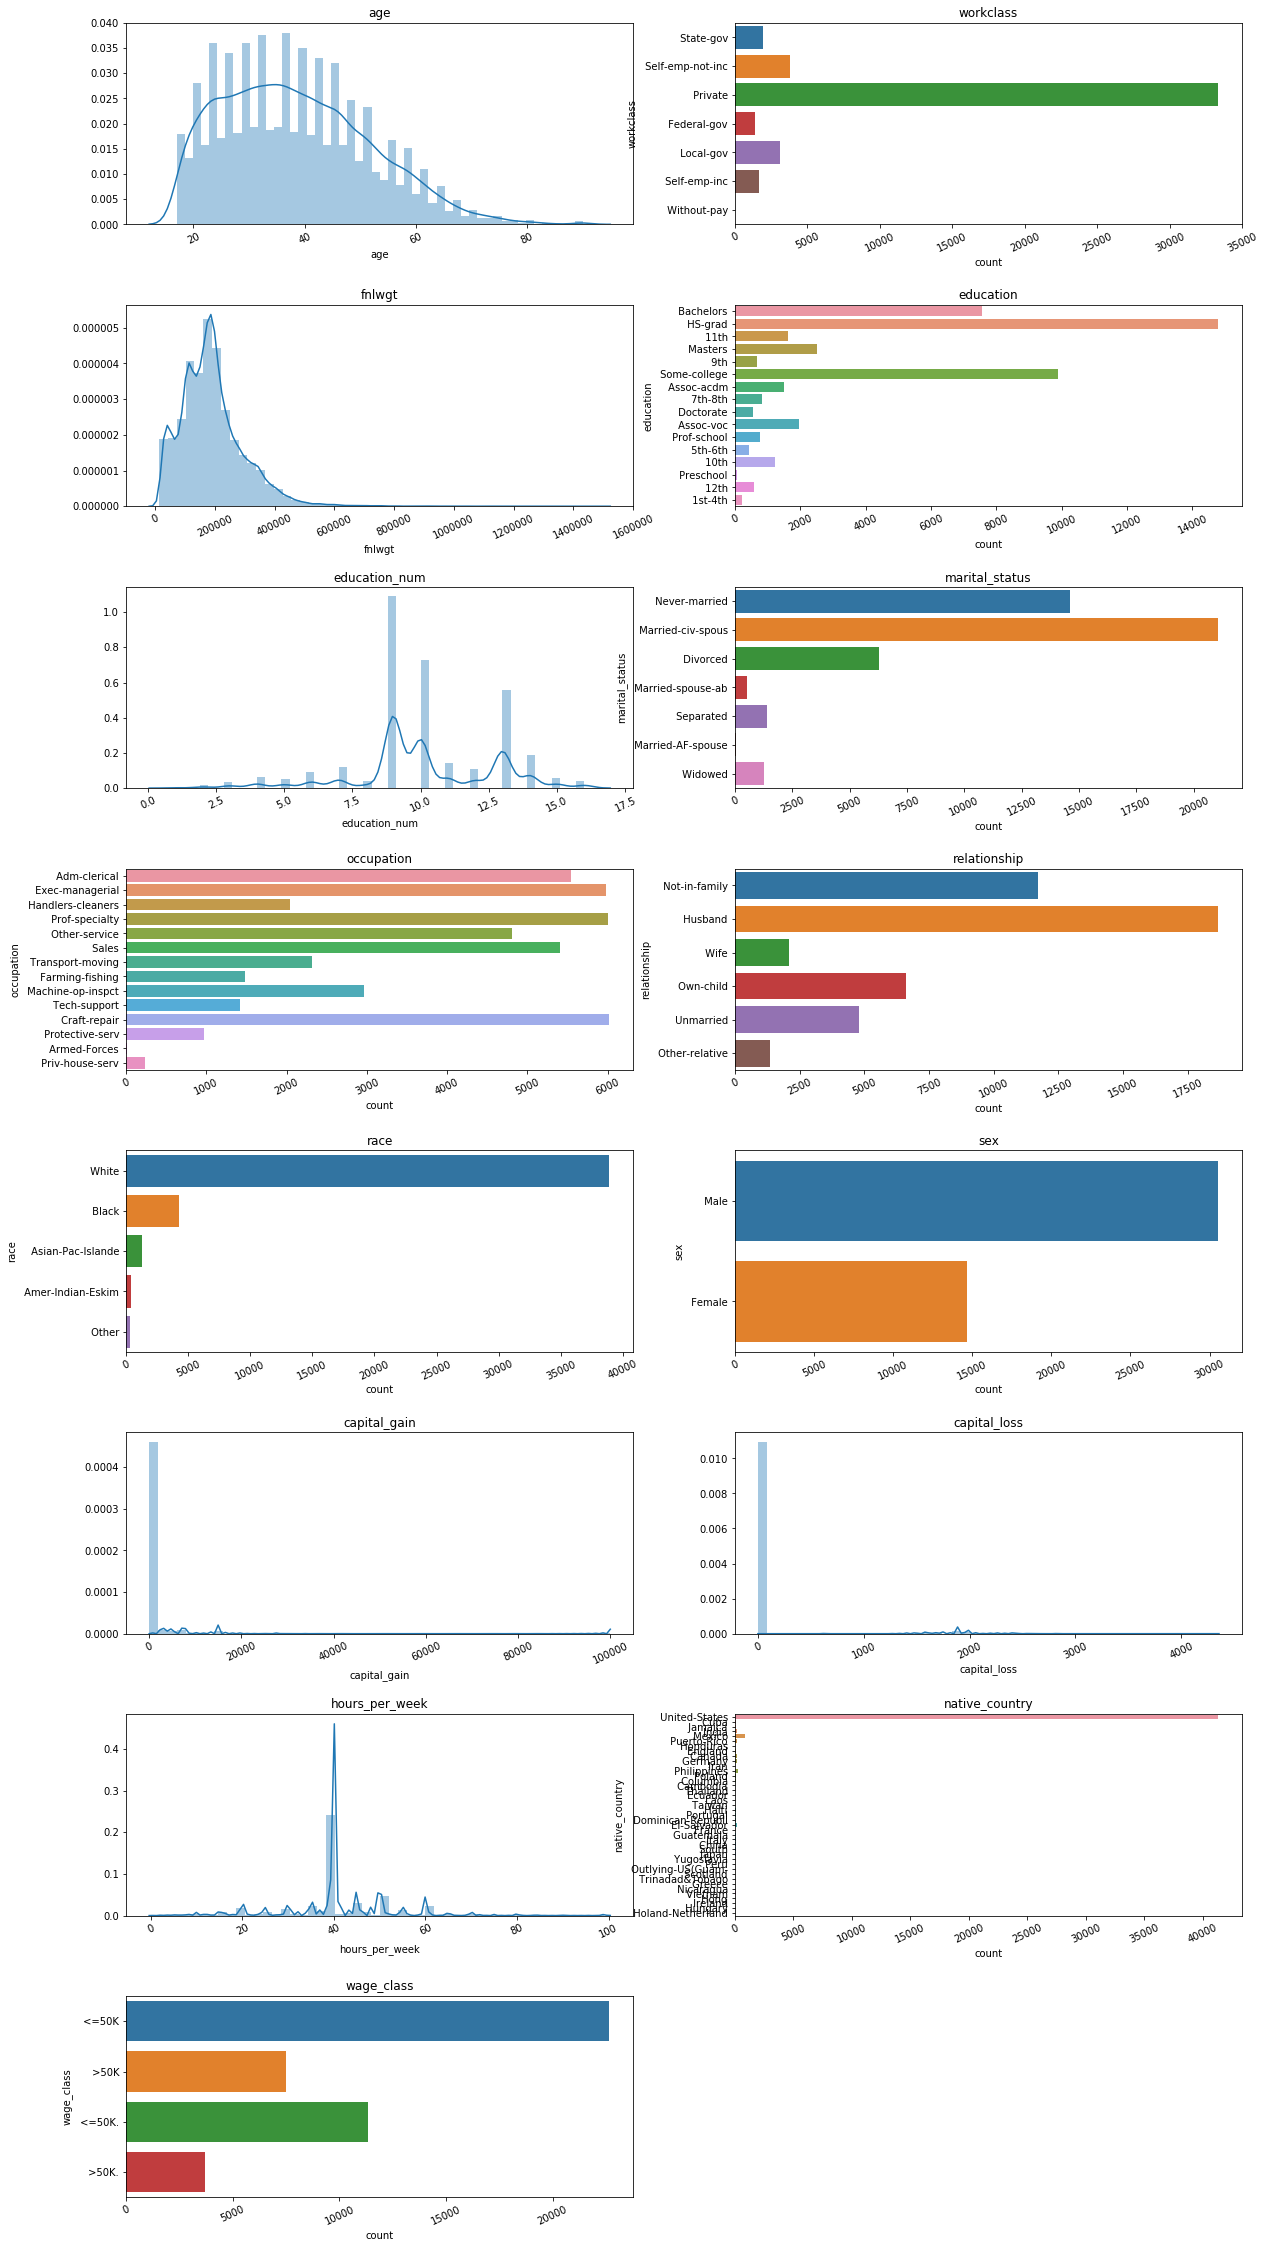

In [11]:
def plot_distribution(data,cols,width,height,hspace,wspace):
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace)
    
    rows = math.ceil(float(data.shape[1]/cols))
    
    for i, column in enumerate(data.columns):
        ax = fig.add_subplot(rows,cols,i+1)
        ax.set_title(column)
        
        if data.dtypes[column] == np.object:
            g = sns.countplot(y=column,data=data)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation = 25)
            
        else:
            g = sns.distplot(data[column])
            plt.xticks(rotation = 25)
            
plot_distribution(train.append(test),cols = 2, width = 20, height = 40, hspace=0.4, wspace = 0.2)

Almost all the people are from United States, native country is not expected to be a predictive/discriminative variable, we will drop it to make one-hot-encoding generate less columns later. We see wage_class has duplicates and require cleaning

In [12]:
train.drop('native_country',axis=1,inplace=True)
test.drop('native_country',axis=1,inplace=True)

In [13]:
df = train.append(test)
df.head(10)
df.wage_class.value_counts()
df['wage_class'] = df.wage_class.str.replace('>50K.','>50K').str.replace('<=50K.','<=50K')
df.wage_class.value_counts()  #check replacement

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,>50K


 <=50K     22654
 <=50K.    11360
 >50K       7508
 >50K.      3700
Name: wage_class, dtype: int64

 <=50K    34014
 >50K     11208
Name: wage_class, dtype: int64

# Notes on LabelEncoding and OneHotEncoding 

In [14]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[4])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['hot']


/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Preparing Numerical Data for algorithms that cannot handle categorical 

## Label Encode --> One Hot Encode 

In [15]:
df_obj = df.iloc[:,:-1].select_dtypes(include = object)    #exclude target column of wage_class
df_obj.head()

,workclass,education,marital_status,occupation,relationship,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoded_x = None
for i in range(0, df_obj.shape[1]):
    print(df_obj.iloc[:2,i])   #check column order
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(df_obj.values[:,i])      #fit_transform each categorical column
    feature = feature.reshape(df.shape[0], 1)   #make 2d array for onehot_encoder
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("Encoded string columns: ", encoded_x.shape)
encoded_x[:3,:]   #view sample of encoded values

0            State-gov
1     Self-emp-not-inc
Name: workclass, dtype: object
0     Bachelors
1     Bachelors
Name: education, dtype: object
0          Never-married
1     Married-civ-spouse
Name: marital_status, dtype: object
0        Adm-clerical
1     Exec-managerial
Name: occupation, dtype: object
0     Not-in-family
1           Husband
Name: relationship, dtype: object
0     White
1     White
Name: race, dtype: object
0     Male
1     Male
Name: sex, dtype: object
Encoded string columns:  (45222, 57)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1.]])

## Attaching original numeric values to the One hot encoded features

In [17]:
df_num = df.iloc[:,:-1].select_dtypes(exclude = object)    #exclude target column of wage_class
df_num.head()
encoded_x.shape

np_full = np.concatenate((encoded_x,df_num.values),axis = 1)
np_full.shape   #check combination

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


(45222, 57)

(45222, 63)

It is unnecessary to scale features for XGboost.

> "Classification trees are invariant under all monotone transformations of individual ordered variables. The reason is that classification trees split nodes by thresholding. Monotone transformations cannot change the possible ways of dividing data points by thresholding." https://onlinecourses.science.psu.edu/stat857/node/55/

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoded_y = label_encoder.fit_transform(df.iloc[:,-1])

#checking encoding correctness 
label_encoded_y[:100] 
label_encoded_y.shape

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

(45222,)

# XgBoost 

## Using Train-Test Split 

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(np_full, label_encoded_y, test_size=test_size, random_state=seed)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.10%


## Feature Importance  

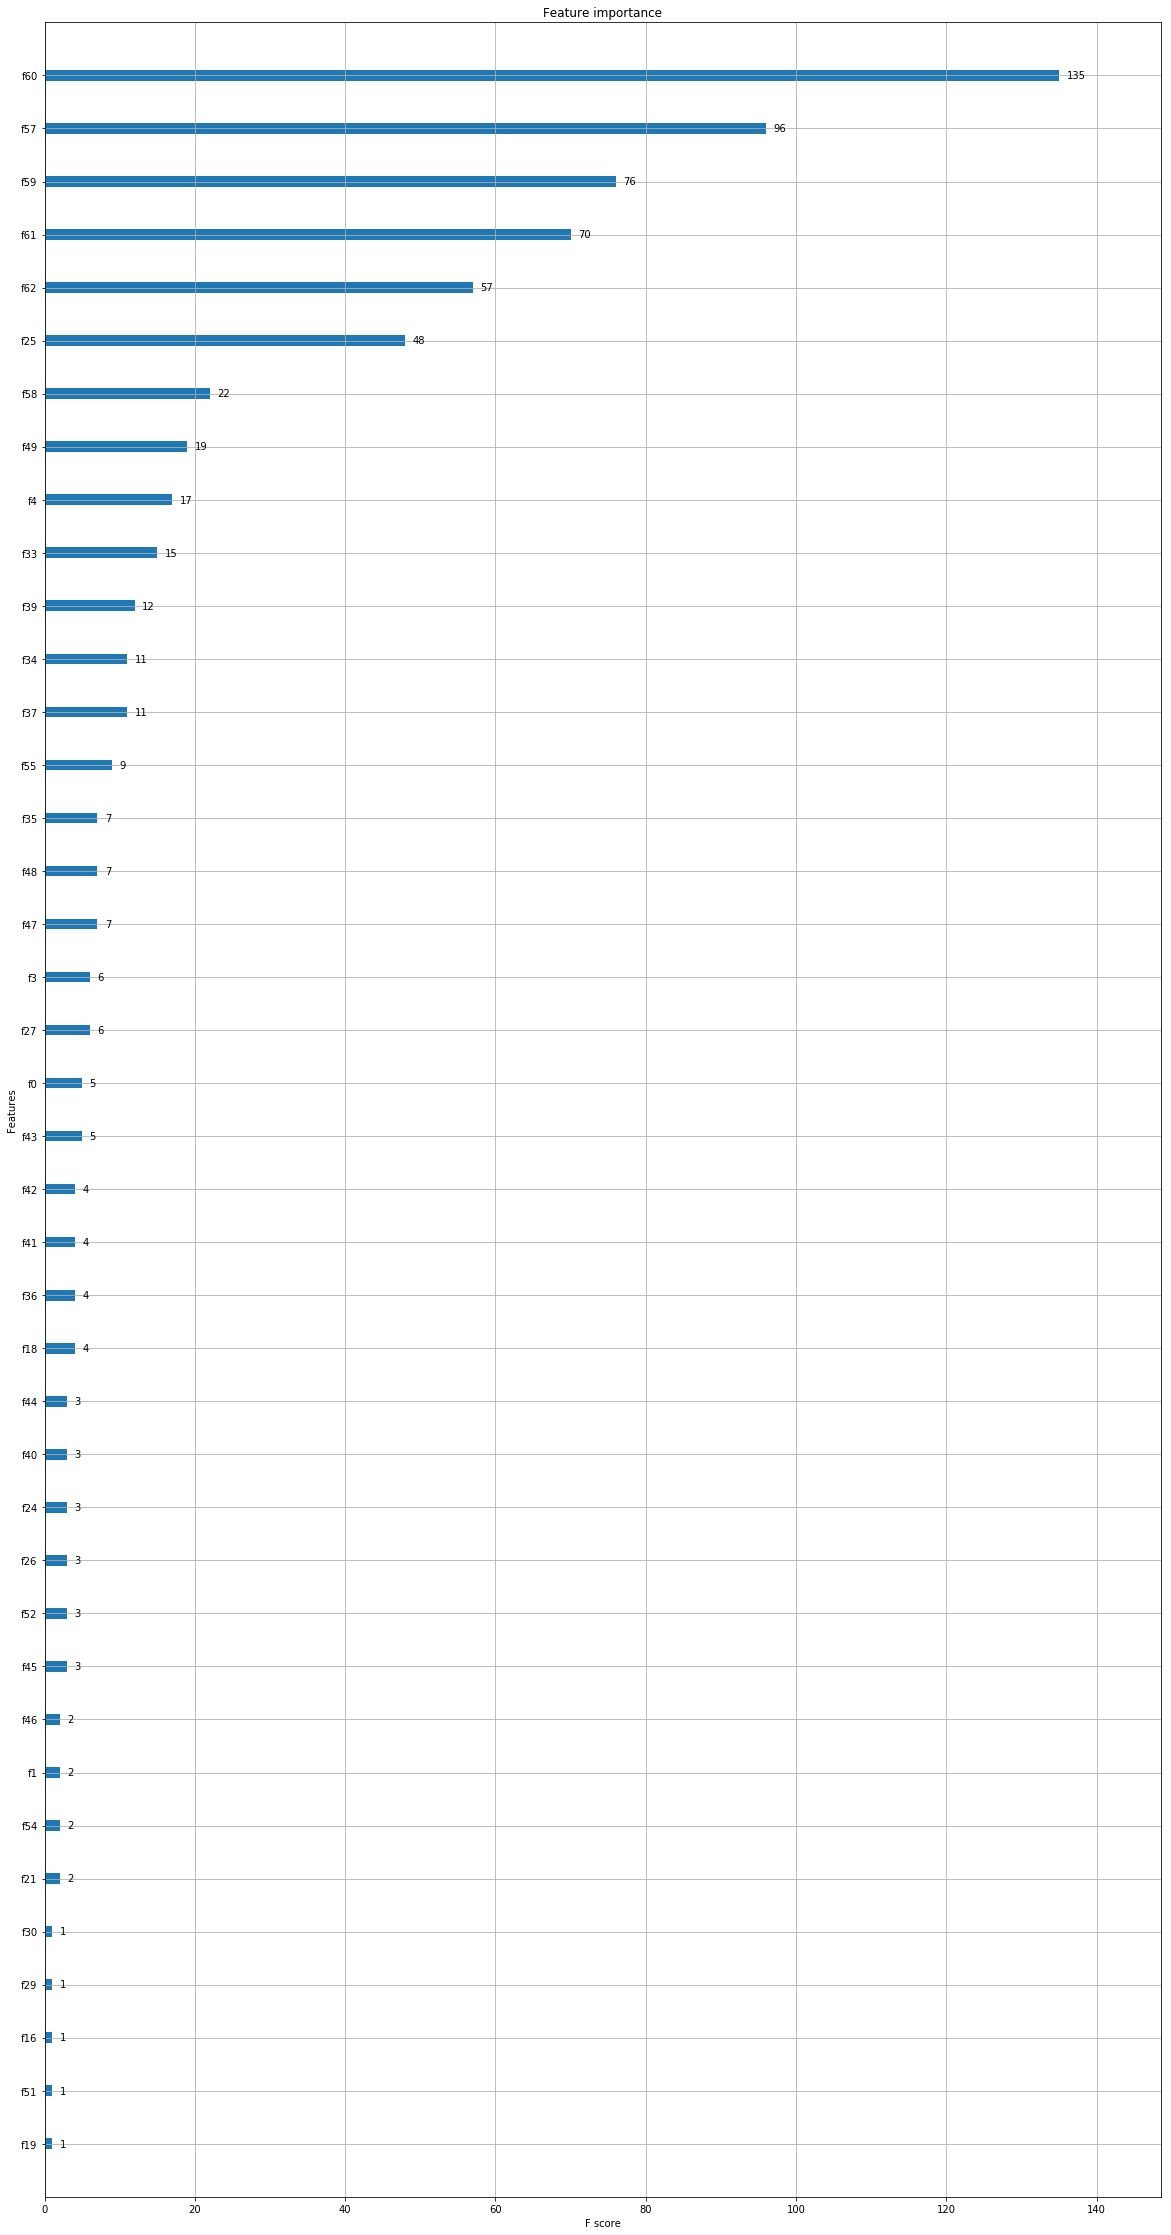

In [21]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(20,40))
plot_importance(model,ax)
plt.show()

## Using Thresholds to subset features for model 

In [22]:
from sklearn.feature_selection import SelectFromModel

thresholds = np.array(sorted(model.feature_importances_,reverse=True))
print(thresholds)

accuracies = [] 

for thresh in thresholds[:10]:   #only testing first 10 thresholds beginning with least features selected
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


[0.19622093 0.13953489 0.11046512 0.10174418 0.08284884 0.06976745
 0.03197674 0.02761628 0.0247093  0.02180232 0.01744186 0.01598837
 0.01598837 0.0130814  0.01017442 0.01017442 0.01017442 0.00872093
 0.00872093 0.00726744 0.00726744 0.00581395 0.00581395 0.00581395
 0.00581395 0.00436047 0.00436047 0.00436047 0.00436047 0.00436047
 0.00436047 0.00290698 0.00290698 0.00290698 0.00290698 0.00145349
 0.00145349 0.00145349 0.00145349 0.00145349 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.196, n=1, Accuracy: 79.97%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.140, n=2, Accuracy: 79.91%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.110, n=3, Accuracy: 81.90%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.102, n=4, Accuracy: 82.80%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.083, n=5, Accuracy: 83.20%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.070, n=6, Accuracy: 85.73%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.032, n=7, Accuracy: 85.67%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.028, n=8, Accuracy: 85.84%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.025, n=9, Accuracy: 86.01%


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Thresh=0.022, n=10, Accuracy: 85.98%


/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Accuracies for each threshold')

Text(0.5,0,'Threshold')

Text(0,0.5,'Accuracy')

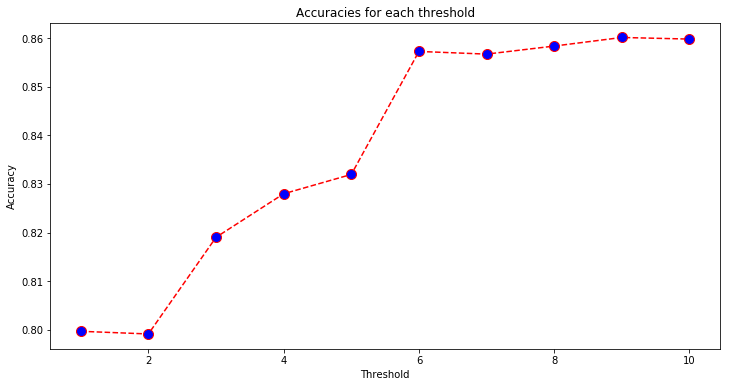

In [23]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1,11),accuracies, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracies for each threshold')  
plt.xlabel('Threshold')  
plt.ylabel('Accuracy')  

From the graph, we see selecting the top 6 features are sufficient if training speed and interpretability is important.

## Using Cross validation   (3-fold is 86.14% ,  10-fold 86.10%)

In [24]:
from sklearn import model_selection

model = XGBClassifier()
kfold = model_selection.KFold(n_splits=3, random_state=seed)
results = model_selection.cross_val_score(model,np_full, label_encoded_y, cv=kfold)   #no train-test split in Cross validation
print(results.mean())

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8614391225509709


/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Adaboost  (3 fold cross validation)

In [25]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=3, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model,np_full, label_encoded_y, cv=kfold)   #no train-test split in Cross validation
print(results.mean())

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8525496439785946


Kfolds doesn't allow saving the intermediate models. To access feature_importance_, must manually split the data and loop through it fitting and saving each model's feature importances

# Gradient Descent  (Stochastic Gradient Descent if `subsample` parameter< 1) 

In [26]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=3, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed, subsample = 0.8, verbose = 1)
results = model_selection.cross_val_score(model,np_full, label_encoded_y, cv=kfold)
print(results.mean())

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0478           0.0706            9.49s
         2           0.9950           0.0534            9.39s
         3           0.9464           0.0449            9.90s
         4           0.9141           0.0343            9.65s
         5           0.8848           0.0296            9.47s
         6           0.8573           0.0250            9.53s
         7           0.8357           0.0212            9.36s
         8           0.8170           0.0184            9.21s
         9           0.7983           0.0163            9.20s
        10           0.7860           0.0135            9.11s
        20           0.6983           0.0059            8.24s
        30           0.6625           0.0034            7.02s
        40           0.6357           0.0024            6.01s
        50           0.6203           0.0005            4.96s
        60           0.6185           0.0022            3.93s
       

Readings on feature importance computation for GBC: https://stats.stackexchange.com/questions/162162/relative-variable-importance-for-boosting

# Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(np_full, label_encoded_y, test_size=test_size, random_state=seed)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy of logistic regression classifier on test set: 0.79
[[6553  212]
 [1709  571]]


# SVC 

In [28]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear',C=1)  

X_train_exp = X_train[:1000]
y_train_exp = y_train[:1000]


svclassifier.fit(X_train_exp, y_train_exp)  



y_pred = svclassifier.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[6588  177]
 [1787  493]]
             precision    recall  f1-score   support

          0       0.79      0.97      0.87      6765
          1       0.74      0.22      0.33      2280

avg / total       0.77      0.78      0.74      9045



# Voting Ensemble   (SVC takes too long to run, not appended)

In [29]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=3, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()   #DT has no verbose parameter
estimators.append(('cart', model2))
model3 = SVC(verbose=1)
#estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, np_full, label_encoded_y, cv=kfold)
print(results.mean())

/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8102251116713104


/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Random Forest (model.fit requires numerical in Sklearn, even though in theory trees can handle categorical)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(np_full, label_encoded_y, test_size=test_size, random_state=seed)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy of Random Forest classifier on test set: 0.84
[[6272  493]
 [ 954 1326]]
             precision    recall  f1-score   support

          0       0.87      0.93      0.90      6765
          1       0.73      0.58      0.65      2280

avg / total       0.83      0.84      0.83      9045



# Conclusion 

* Each of the models can be further tuned, Kfolds of voting Ensemble is reduced to save computation time (10 takes more than 10 minutes withouto results)
* Gradient Boosting is the most accurate at 86.38%, but other algorithms are close behind at 85% too